In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (6, 4)  # just used to set size of figure plotted

In [2]:
data_set = pd.read_csv('student-mat.csv', sep=';')
data_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data_set = data_set[['G1', 'G2', 'G3', 'studytime', 'failures', 'activities', 'internet', 'health', 'absences']]
data_set.head()

,G1,G2,G3,studytime,failures,activities,internet,health,absences
0,5,6,6,2,0,no,no,3,6
1,5,5,6,2,0,no,yes,3,4
2,7,8,10,2,3,no,yes,3,10
3,15,14,15,3,0,yes,yes,5,2
4,6,10,10,2,0,no,no,5,4


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 9 columns):
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
activities    395 non-null object
internet      395 non-null object
health        395 non-null int64
absences      395 non-null int64
dtypes: int64(7), object(2)
memory usage: 27.9+ KB


In [5]:
data_set.describe()

,G1,G2,G3,studytime,failures,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190,2.035443,0.334177,3.554430,5.708861
std,3.319195,3.761505,4.581443,0.839240,0.743651,1.390303,8.003096
min,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,8.000000,9.000000,8.000000,1.000000,0.000000,3.000000,0.000000
50%,11.000000,11.000000,11.000000,2.000000,0.000000,4.000000,4.000000
75%,13.000000,13.000000,14.000000,2.000000,0.000000,5.000000,8.000000
max,19.000000,19.000000,20.000000,4.000000,3.000000,5.000000,75.000000


# Data Preprocessing

In [6]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# encoded activities column
l_e1 = LabelEncoder()
l_e1.fit(data_set['activities'])
data_set['activities'] = l_e1.transform(data_set['activities'])

# encoded internet column
l_e2 = LabelEncoder()
l_e2.fit(data_set['internet'])
data_set['internet'] = l_e2.transform(data_set['internet'])

[Text(0, 0.5, 'G3'),
 Text(0.5, 0, 'absences'),
 Text(0.5, 1.0, 'Scatter plot for absences')]

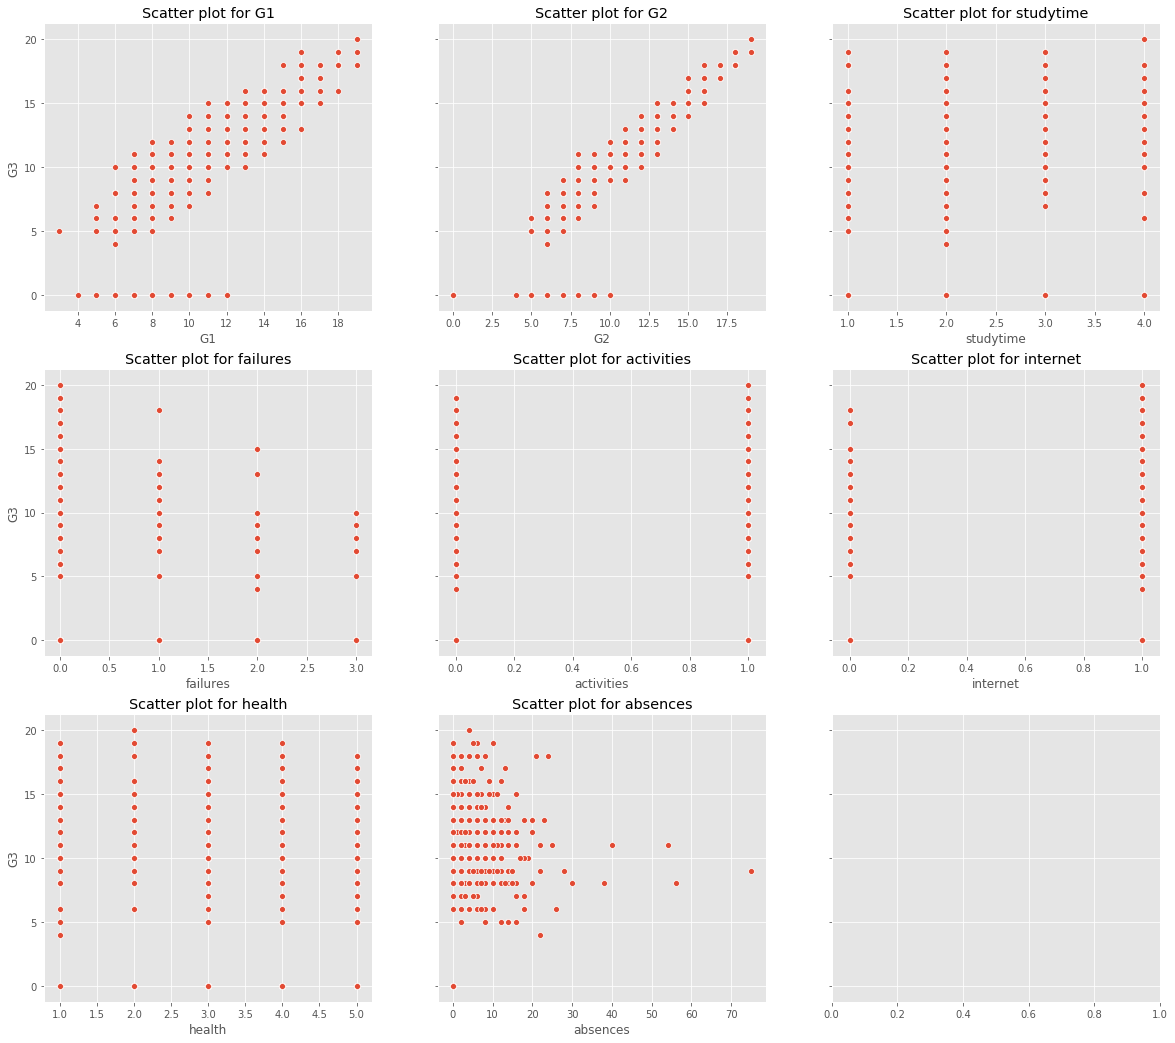

In [7]:
# scatter pairplots
fig1, ax1 =plt.subplots(nrows=3, ncols=3, figsize=(20, 18), sharey='all')
sns.scatterplot(x=data_set['G1'], y=data_set['G3'], ax=ax1[0][0])
ax1[0][0].set(xlabel="G1", ylabel = "G3", title='Scatter plot for G1')

sns.scatterplot(x=data_set['G2'], y=data_set['G3'], ax=ax1[0][1])
ax1[0][1].set(xlabel="G2", ylabel = "G3", title='Scatter plot for G2')

sns.scatterplot(x=data_set['studytime'], y=data_set['G3'], ax=ax1[0][2])
ax1[0][2].set(xlabel="studytime", ylabel = "G3", title='Scatter plot for studytime')

sns.scatterplot(x=data_set['failures'], y=data_set['G3'], ax=ax1[1][0])
ax1[1][0].set(xlabel="failures", ylabel = "G3", title='Scatter plot for failures')

sns.scatterplot(x=data_set['activities'], y=data_set['G3'], ax=ax1[1][1])
ax1[1][1].set(xlabel="activities", ylabel = "G3", title='Scatter plot for activities')

sns.scatterplot(x=data_set['internet'], y=data_set['G3'], ax=ax1[1][2])
ax1[1][2].set(xlabel="internet", ylabel = "G3", title='Scatter plot for internet')

sns.scatterplot(x=data_set['health'], y=data_set['G3'], ax=ax1[2][0])
ax1[2][0].set(xlabel="health", ylabel = "G3", title='Scatter plot for health')

sns.scatterplot(x=data_set['absences'], y=data_set['G3'], ax=ax1[2][1])
ax1[2][1].set(xlabel="absences", ylabel = "G3", title='Scatter plot for absences')

In [8]:
# eleminating the feaures that are not following the linear pattern
data_set = data_set[['G1', 'G2', 'G3', 'failures']]
data_set.head()

,G1,G2,G3,failures
0,5,6,6,0
1,5,5,6,0
2,7,8,10,3
3,15,14,15,0
4,6,10,10,0


Skewness of G1:  0.24061324337096948
Skewness of G2:  -0.4316453889925487


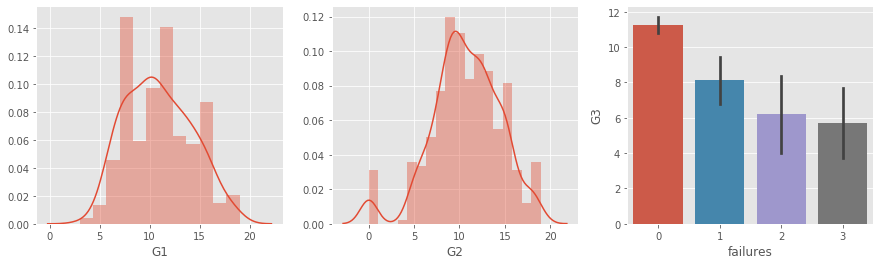

In [9]:
# Histograms for G1 and G2 as they are continuous variables and barplot for failure as it is discrete column.
fig2, ax2 =plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# G1
g1 = data_set['G1']
sns.distplot(a=g1, kde=True, ax=ax2[0], axlabel='G1')

# G2
g2 = data_set['G2']
sns.distplot(a=g2, kde=True, ax=ax2[1], axlabel='G2')

# failures
failures = data_set['failures']
sns.barplot(x=data_set['failures'], y=data_set['G3'], ax=ax2[2])

print(f'Skewness of G1: ', pd.Series(g1).skew())  # skewness for G1
print(f'Skewness of G2: ', pd.Series(g2).skew())  # skewness for G2

## Interpretation 1: Skewness of G1 and G2 are at the acceptable rate ie. between -0.5 to 0.5.      And scatter plot and barplot of faliures say that it is following linear pattern, as G3 decreases as faliures increases.

Outlairs(G1):  []
Outlairs(G2): []


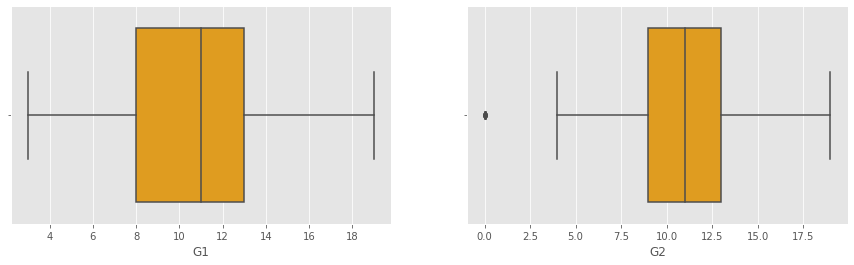

In [10]:
# check for outliars

# Boxplots
from scipy import stats
fig3, ax3 =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# G1
sns.boxplot(x=g1, color='orange', ax=ax3[0]) 
ax3[0].set(xlabel="G1")
z_g1 = np.abs(stats.zscore(g1))  # z scores for G1 values

# G2
sns.boxplot(x=g2, color='orange', ax=ax3[1])
ax3[1].set(xlabel="G2")
z_g2 = np.abs(stats.zscore(g2))  # z score of G2 values
 
# we will use the threshold of 3 to detect outliars
outlairs_g1 = [outliar for outliar in z_g1 if outliar > 3]
print(f'Outlairs(G1): ', outlairs_g1)
outlairs_g2 = [outliar for outliar in z_g2 if outliar > 3]
print(f'Outlairs(G2):', outlairs_g2)

In [11]:
"""
NOTE:- above figure shows that there is only 1 outliar but it is not as there are many outliars at same position/value.
You can see that from below...
"""

# getting the outliar and their respective index in G2
g2_outliar_index = [(outliar, index) for index, outliar in zip(range(0, len(g2), 1), g2) if outliar < 2.5]  # outliars and their respective index
g2_outliar_index

[(0, 130),
 (0, 131),
 (0, 134),
 (0, 135),
 (0, 136),
 (0, 137),
 (0, 144),
 (0, 153),
 (0, 162),
 (0, 242),
 (0, 244),
 (0, 269),
 (0, 332)]

In [12]:
# removing the outliars detected above
indexes = [index[1] for index in g2_outliar_index]  # get indexes of all the ouliars
data_set.drop(labels=indexes, axis=0, inplace=True)  # drop the respective rows

In [13]:
# update values
g1 = data_set['G1'].values
g2 = data_set['G2'].values
g3 = data_set['G3'].values
failures = data_set['failures'].values

Skewness of G3: -0.7047421695966166


[Text(0.5, 0, 'G3')]

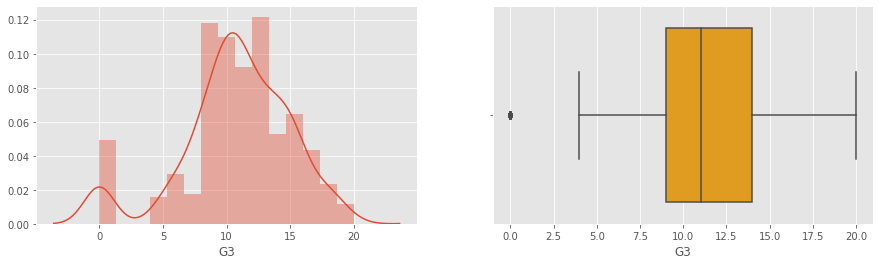

In [14]:
# Checking for outliars in G3 by histogram and Boxplot
fig4, ax4 =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=g3, kde=True, ax=ax4[0], axlabel='G3')  # Histogram
print(f"Skewness of G3: {pd.Series(data_set['G3']).skew()}")

sns.boxplot(x=g3, color='orange', ax=ax4[1])  # Boxplot
ax4[1].set(xlabel="G3")      

## Interpretation 2: G3 is skewed, we can see it from the histogram and outliar we can see from boxplot

In [15]:
# Get index and outliar from the G3
g3_outliar_index = [(index, outliar) for index, outliar in zip(data_set.index, g3) if outliar < 2.5]  # data_set.index gives list of all the indexes from our data_set

# removing outliars
outliar_indexes = [index[0] for index in g3_outliar_index]  # removing outliar
data_set.drop(labels=outliar_indexes, axis=0, inplace=True)

In [16]:
# update values
g1 = data_set['G1'].values
g2 = data_set['G2'].values
g3 = data_set['G3'].values
failures = data_set['failures'].values

Skewness of G3: 0.20925593669739645


[Text(0.5, 0, 'G3')]

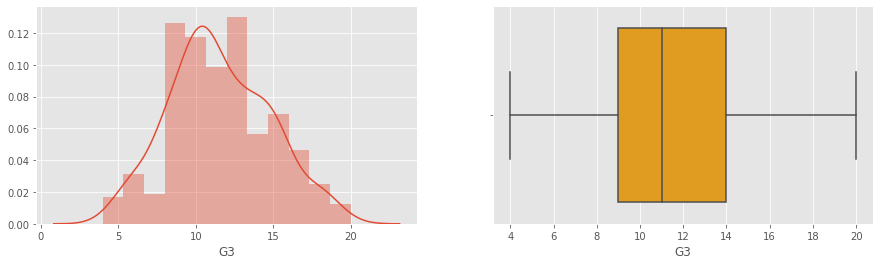

In [17]:
# Checking for outliars in G3 by histogram and Boxplot after removing the outliars
fig5, ax5 =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=g3, kde=True, ax=ax5[0], axlabel='G3')  # Histogram
print(f"Skewness of G3: {pd.Series(data_set['G3']).skew()}")

sns.boxplot(x=g3, color='orange', ax=ax5[1])  # Boxplot
ax5[1].set(xlabel="G3")     

## Interpretation 3: Skewness of G3 and outliar is removed

In [18]:
# correlation matrix used for checking multicolinearity
corr_matrix = data_set.corr()  # correlation matrix
corr_matrix

,G1,G2,G3,failures
G1,1.000000,0.901940,0.891805,-0.302071
G2,0.901940,1.000000,0.965583,-0.301316
G3,0.891805,0.965583,1.000000,-0.293831
failures,-0.302071,-0.301316,-0.293831,1.000000


(4.0, 0.0)

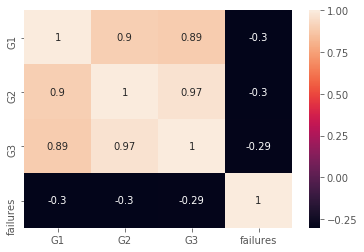

In [19]:
# Heatmap of corelation matrix
ax = sns.heatmap(data=corr_matrix, annot=True)

# below two lines are just to put the heat map or matrix properly 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [20]:
# VIF used for checking multicolinearity
from statsmodels.regression.linear_model import OLS
columns = [column for column in data_set.columns if column != 'G3']  # get all features names

for col in columns:
    t_y = data_set[col].values.reshape(-1, 1)
    t_x = [data_set[c].values.reshape(-1, 1) for c in columns if c != col][0]
    t_x = np.append(arr=np.ones((len(t_y), 1)).astype(int), values=t_x, axis=1)  # add constant ie. 1's
    
    # fit model for respective regressor
    t_x = np.array(t_x, dtype=float)
    ols_tv = OLS(endog=t_y, exog=t_x)
    regressor = ols_tv.fit()
    r_square = regressor.rsquared
    vif = round(1 / (1 - r_square),4)
    print(f'Variation inflation factor(VIF) for column {col} is: ', vif)  # results below is same because we have only 2 columns ie. TV and radio (newspaper is removed before) and as first we check VIF for TV with radio and we check VIF for radio with TV, Therefore we get same results.

Variation inflation factor(VIF) for column G1 is:  5.3618
Variation inflation factor(VIF) for column G2 is:  5.3618
Variation inflation factor(VIF) for column failures is:  1.1004


## Interpretation 4: Correlation matrix says that G1 and G2 are highly corelated, but VIF says that they are not, basically G1 and G2 need to be correlated as they are like G3 only, as G1, G2, G3 all are scores/marks only. So here the correlation of G1 and G2 is accepted.

# Making MODEL

In [21]:
# Dividing data into dependent and independent variables
X_data_set = data_set.loc[:, ['G1', 'G2','failures']]  # pandas version of X columns
X = data_set.loc[:, ['G1', 'G2','failures']].values
X = np.append(arr=np.ones((len(X), 1)).astype(int), values=X, axis=1)  # appended ones at front of the matrix
Y = data_set['G3'].values.reshape(-1, 1)

In [22]:
# Apply backward elemination algorithm with significance level = 0.5

from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20)
x_train = np.array(x_train, dtype=float)

columns = [0,1,2,3]
significant_columns = []

while True:
    new_x_opt = x_train[:, columns]
    ols = OLS(endog=y_train, exog=new_x_opt)
    model = ols.fit()

    p_values = model.pvalues  # get p-values
    
    for index, pvalue in zip(columns, p_values):
        if pvalue > 0.05 and index != 0: 
            columns.remove(columns[index])
            break
    else:
        columns_names = [c_name for c_name in X_data_set.columns]
        for c in columns:
            if c != 0:
                significant_columns.append(columns_names[c-1])
        break
    continue

In [23]:
print('Significant columns are: ', significant_columns)

Significant columns are:  ['G1', 'G2']


In [24]:
# Make new model with statistically significant variables/columns/features
X = data_set.loc[:, ['G1', 'G2']].values
X = np.append(arr=np.ones((len(X), 1)).astype(int), values=X, axis=1)  # appended ones at front of the matrix
Y = data_set['G3'].values.reshape(-1, 1)

from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20)
x_train = np.array(x_train, dtype=float)
new_x_opt = x_train[:, [0,1,2]]
ols = OLS(endog=y_train, exog=new_x_opt)
model = ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     2033.
Date:                Fri, 03 Jul 2020   Prob (F-statistic):          3.00e-168
Time:                        17:09:34   Log-Likelihood:                -351.93
No. Observations:                 285   AIC:                             709.9
Df Residuals:                     282   BIC:                             720.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0716      0.187      0.382      0.7

In [25]:
model.params  # coefficients

array([0.07163925, 0.10383056, 0.90535241])

In [26]:
predicted_Y = model.predict(x_test)  # predict y test values

In [27]:
real_values = [value[0] for value in y_test]  
predicted_values = predicted_Y

In [28]:
# compare values
data = [(r, p) for r, p in zip(real_values, predicted_values)]
df = pd.DataFrame(data=data, index=range(0, len(predicted_values)), columns=['Real_values', 'Predicted_values'])

In [29]:
df.head()

,Real_values,Predicted_values
0,15,15.417045
1,17,16.322397
2,11,12.389496
3,8,8.248934
4,14,14.304031


In [30]:
# Apply k-fold cross validation where k is 5
from sklearn.model_selection import KFold 
from statsmodels.tools.eval_measures import rmse, mse, meanabs
kf = KFold(n_splits=5, random_state=1999) # Define the split - into 5 folds 
k = kf.get_n_splits(X) # returns the number of folds
print('Number of folds:', k)

r_squared_list = []
adj_r_squared_list = []
mse_list = []
rmse_list = []
mae_list = []

for train_index, test_index in kf.split(X):  # returns k train and test indexes
    x_train = [X[index] for index in train_index]
    y_train = [Y[index] for index in train_index]
    x_test = [X[index] for index in test_index]
    y_test = [Y[index] for index in test_index]
        
    ols = OLS(endog=y_train, exog=x_train)
    model = ols.fit()
    
    r_squared_list.append(model.rsquared)  # r_squared
    adj_r_squared_list.append(model.rsquared_adj)  # adj r_squared
        
    y_test = [value[0] for value in y_test]  # reformat y_test into 1D array from 2D array
    predict_y = model.predict(exog=x_test)
   
    mse_value = mse(y_test, predict_y) # mean square error
    rmse_value = rmse(y_test, predict_y) # root mean square error
    mae_value = meanabs(y_test, predict_y) # mean absolute error

    mse_list.append(mse_value)
    rmse_list.append(rmse_value)
    mae_list.append(mae_value)

Number of folds: 5


In [31]:
# Results
print("RESULTS: \n")
print(f'Max r_squared: {round(max(r_squared_list), 5)}')
print(f'Min r_squared: {round(min(r_squared_list), 5)}')
print(f'Average r_squared: {round(np.average(r_squared_list), 5)}')
print()
print(f'Max adj_r_squared: {round(max(adj_r_squared_list), 5)}')
print(f'Min adj_r_squared: {round(min(adj_r_squared_list), 5)}')
print(f'Average adj_r_squared: {round(np.average(adj_r_squared_list), 5)}')
print()
print(f'Max MSE: {round(max(mse_list), 5)}')
print(f'Min MSE: {round(min(mse_list), 5)}')
print(f'Average MSE: {round(np.average(mse_list), 5)}')
print()
print(f'Max RMSE: {round(max(rmse_list), 5)}')
print(f'Min RMSE: {round(min(rmse_list), 5)}')
print(f'Average RMSE: {round(np.average(rmse_list), 5)}')
print()
print(f'Max MAE: {round(max(mae_list), 5)}')
print(f'Min MAE: {round(min(mae_list), 5)}')
print(f'Average MAE: {round(np.average(mae_list), 5)}')

RESULTS: 

Max r_squared: 0.9389
Min r_squared: 0.93023
Average r_squared: 0.93475

Max adj_r_squared: 0.93846
Min adj_r_squared: 0.92973
Average adj_r_squared: 0.93428

Max MSE: 0.95019
Min MSE: 0.46053
Average MSE: 0.6867

Max RMSE: 0.97478
Min RMSE: 0.67862
Average RMSE: 0.82166

Max MAE: 0.737
Min MAE: 0.52422
Average MAE: 0.63258


In [32]:
# save model
import pickle  
with open('Model.txt','wb') as f:
    pickle.dump(model, f)